In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
shelter = pd.read_csv(r'D:\Entity Academy\Final Project\Week 1 Project Planning\Animal_Shelter_Animals.csv')
pd.set_option('display.max_columns', None)
shelter.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,02/29/2020 12:00:00 AM,Reclaimed,False,NaN,Stray,NaN,Died in care,False,False,False
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False


In [4]:
shelter['animalage_years'] = shelter['animalage'].apply(lambda x: int(x.split()[0]))

In [5]:
shelter.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,animalage_years
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,11
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,10
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False,8
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,02/29/2020 12:00:00 AM,Reclaimed,False,NaN,Stray,NaN,Died in care,False,False,False,8
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False,10


In [6]:
shelter.movementtype.value_counts()

Adoption            11051
Foster               4973
Reclaimed            2485
Transfer              710
None                   55
Released To Wild       36
Escaped                 9
Stolen                  8
Name: movementtype, dtype: int64

In [10]:
shelter.animalage_years.value_counts()

1      3606
2      3421
3      2856
8      2661
4      1354
5       898
7       712
6       705
11      587
10      576
9       518
12      217
14      175
13      170
16      121
15      114
21       86
22       67
17       59
18       58
23       49
24       47
19       47
25       46
26       35
20       31
30       20
31       15
101      10
28        9
35        9
34        9
32        9
99        7
33        6
100       4
29        4
102       3
37        2
58        1
36        1
972       1
0         1
Name: animalage_years, dtype: int64

<AxesSubplot:title={'center':'Movement Type'}>

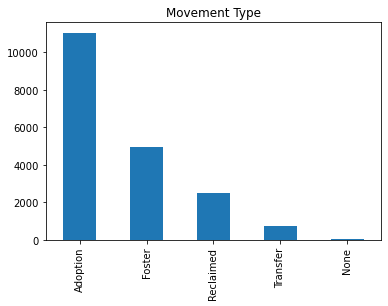

In [8]:
plt.title('Movement Type')
shelter['movementtype'].value_counts().nlargest(5).plot.bar()

<AxesSubplot:title={'center':'Animal Age'}>

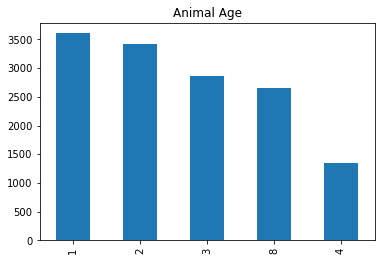

In [7]:
plt.title('Animal Age')
shelter['animalage_years'].value_counts().nlargest(5).plot.bar()

<AxesSubplot:title={'center':'Dates'}>

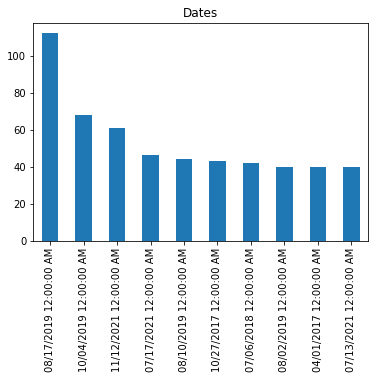

In [8]:
plt.title('Dates')
shelter['movementdate'].value_counts().nlargest(10).plot.bar()

In [24]:
shelter1 = shelter['movementdate'].str.split(' ', expand = True)

In [25]:
shelter1.head()

,0,1,2
0,05/13/2017,12:00:00,AM
1,04/24/2017,12:00:00,AM
2,04/15/2017,12:00:00,AM
3,02/29/2020,12:00:00,AM
4,04/18/2017,12:00:00,AM


In [26]:
shelter1 = shelter['movementdate'].str.split(' ', expand = True).rename(columns = lambda x: "movementDate"+str(x+1))

In [27]:
shelter1.head()

,movementDate1,movementDate2,movementDate3
0,05/13/2017,12:00:00,AM
1,04/24/2017,12:00:00,AM
2,04/15/2017,12:00:00,AM
3,02/29/2020,12:00:00,AM
4,04/18/2017,12:00:00,AM


In [28]:
shelter2 = pd.concat([shelter, shelter1], axis = 1)

In [29]:
shelter2.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,animalage_years,movementDate1,movementDate2,movementDate3
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,11,05/13/2017,12:00:00,AM
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,10,04/24/2017,12:00:00,AM
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False,8,04/15/2017,12:00:00,AM
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,02/29/2020 12:00:00 AM,Reclaimed,False,NaN,Stray,NaN,Died in care,False,False,False,8,02/29/2020,12:00:00,AM
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False,10,04/18/2017,12:00:00,AM


In [30]:
shelter2.drop(['movementdate'], axis=1)

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,animalage_years,movementDate1
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,11,05/13/2017
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,10,04/24/2017
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False,8,04/15/2017
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,Reclaimed,False,NaN,Stray,NaN,Died in care,False,False,False,8,02/29/2020
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False,10,04/18/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19322,72232,01/13/2022 12:43:18 PM,Incompatible with owner lifestyle,False,C2201042,981020045230711,Loki,Domestic Long Hair,Grey and White,Cat,3 years 0 months.,Male,Adoptable Cat Kennels,Adoption,False,NaN,Stray,NaN,Court Order/ Legal,False,False,False,3,01/13/2022
19323,72233,01/13/2022 01:20:50 PM,Stray,False,H2201042,NaN,stray bun,American,Black and White,House Rabbit,99 years 0 months.,Unknown,Feline intake room,Foster,False,NaN,Stray,NaN,Court Order/ Legal,False,False,False,99,01/13/2022
19324,72245,01/14/2022 10:24:03 AM,Stray,False,D2201044,982091063915522,Bruno,Australian Cattle Dog/Bully Breed Mix,White and Liver,Dog,1 year 11 months.,Male,Dog room C,Reclaimed,False,NaN,Stray,NaN,Court Order/ Legal,False,False,False,1,01/15/2022
19325,72252,01/15/2022 10:06:40 AM,Stray,False,D2201051,NaN,Chloe,Beagle,White and Black,Dog,16 years 0 months.,Female,Dog room A,Reclaimed,False,01/16/2022 12:00:00 AM,Stray,NaN,Court Order/ Legal,False,False,False,16,01/16/2022


In [33]:
shelter2.rename(columns={'movementDate1' : 'movementDate'}, inplace=True)

In [34]:
shelter2.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,animalage_years,movementDate,movementDate2,movementDate3
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,11,05/13/2017,12:00:00,AM
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,10,04/24/2017,12:00:00,AM
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False,8,04/15/2017,12:00:00,AM
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,02/29/2020 12:00:00 AM,Reclaimed,False,NaN,Stray,NaN,Died in care,False,False,False,8,02/29/2020,12:00:00,AM
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False,10,04/18/2017,12:00:00,AM


In [38]:
shelter2.drop(['movementdate', 'movementDate2', 'movementDate3', 'deceaseddate', 'deceasedreason', 'diedoffshelter', 
               'puttosleep', 'isdoa'], axis=1)

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementtype,istrial,returndate,returnedreason,animalage_years,movementDate
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,Adoption,False,NaN,Stray,11,05/13/2017
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,Adoption,False,NaN,Stray,10,04/24/2017
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,Adoption,False,02/28/2020 12:00:00 AM,Stray,8,04/15/2017
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,Reclaimed,False,NaN,Stray,8,02/29/2020
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,Foster,False,05/29/2018 12:00:00 AM,Stray,10,04/18/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19322,72232,01/13/2022 12:43:18 PM,Incompatible with owner lifestyle,False,C2201042,981020045230711,Loki,Domestic Long Hair,Grey and White,Cat,3 years 0 months.,Male,Adoptable Cat Kennels,Adoption,False,NaN,Stray,3,01/13/2022
19323,72233,01/13/2022 01:20:50 PM,Stray,False,H2201042,NaN,stray bun,American,Black and White,House Rabbit,99 years 0 months.,Unknown,Feline intake room,Foster,False,NaN,Stray,99,01/13/2022
19324,72245,01/14/2022 10:24:03 AM,Stray,False,D2201044,982091063915522,Bruno,Australian Cattle Dog/Bully Breed Mix,White and Liver,Dog,1 year 11 months.,Male,Dog room C,Reclaimed,False,NaN,Stray,1,01/15/2022
19325,72252,01/15/2022 10:06:40 AM,Stray,False,D2201051,NaN,Chloe,Beagle,White and Black,Dog,16 years 0 months.,Female,Dog room A,Reclaimed,False,01/16/2022 12:00:00 AM,Stray,16,01/16/2022
